In [85]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
digit = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [86]:
# about the dataset

# dimensions
print("Dimensions: ", digit.shape, "\n")

# data types
print(digit.info())

# head
digit.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# the column names 
print(digit.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [88]:

order = list(np.sort(digit['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [89]:
#NaN values in the dataset ?
nan = digit.isnull().sum()
print(nan[nan != 0])

#No Null Values

Series([], dtype: int64)


In [90]:
#Analyse the pixels intensity values
s_pixels = digit.iloc[:, 1:]
s_pixels.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


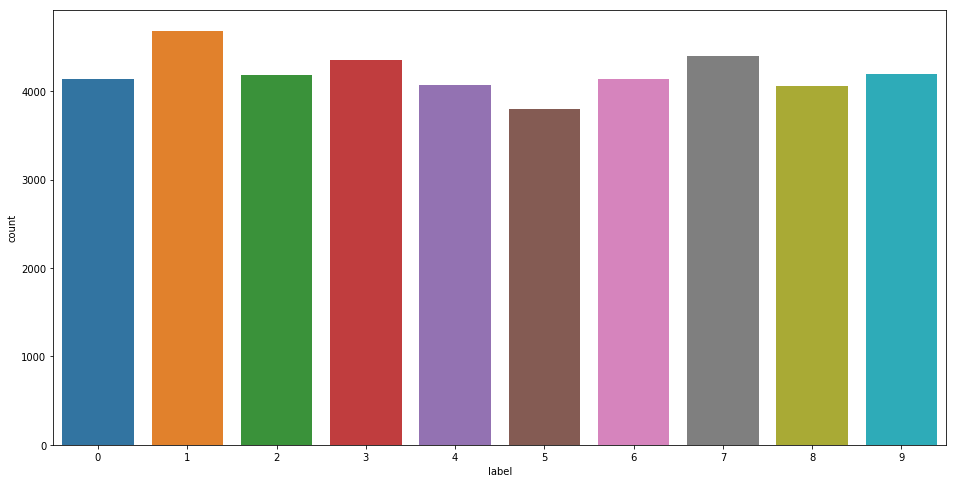

In [91]:
# Count plot of each number in train file

plt.figure(figsize=(16, 8))
sns.countplot(x="label", data=digit)

In [92]:
digit_means = digit.groupby('label').mean()
digit_means.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.210522,0.112655,0.057173,0.019809,0.016687,0.002727,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.580584,0.296300,0.131459,0.042189,0.038800,0.008622,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.111748,0.118155,0.027267,0.0,0.0,0.0,0.0


## Data Sampling

In [93]:
#random Subset for 35% of the original train database
#ince the training dataset is quite large (42,000 labelled images), 
#it would take a lot of time for training an SVM on the full MNIST data, 
# taken a sub-sample the data for training (10-20% of the data 

random_sample = digit.sample(n=8400)

In [94]:
#inspection of random subset
random_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10036,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3598,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11007,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36547,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#inspection of random subset
random_sample.shape

(8400, 785)

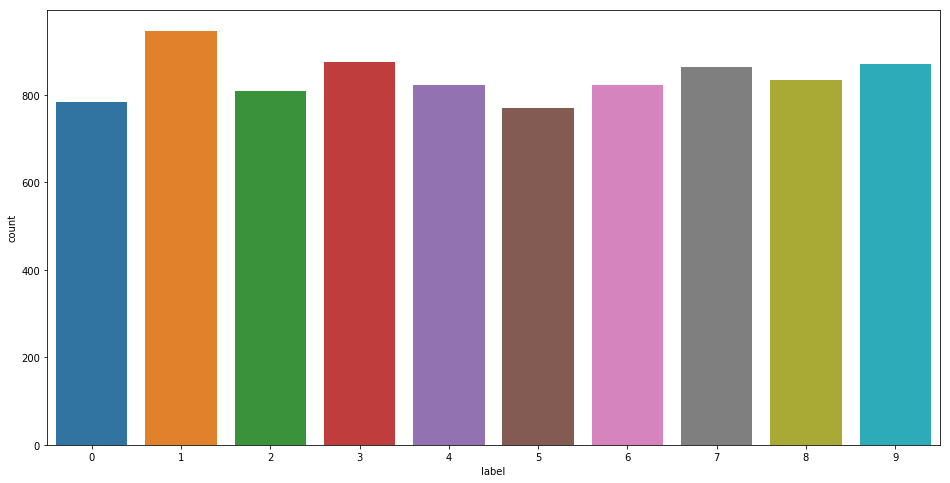

In [96]:
# Count plot of each number in random subset

plt.figure(figsize=(16, 8))
sns.countplot(x="label", data=random_sample)

# The distribuion is similar to original train database

In [97]:
digit_means = random_sample.groupby('label').mean()
digit_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


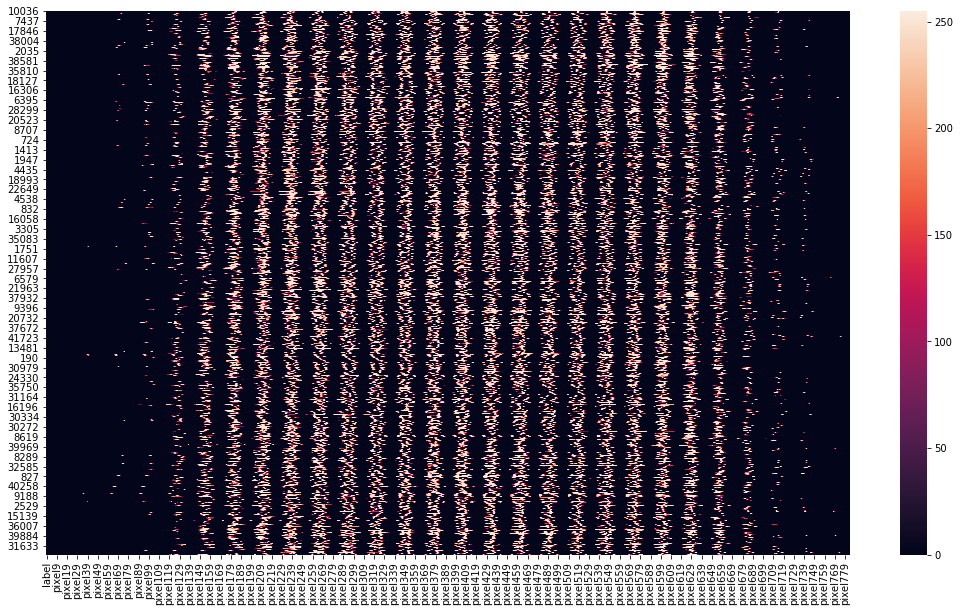

In [98]:

plt.figure(figsize=(18, 10))
sns.heatmap(random_sample)

In [99]:
digit_means = digit.groupby('label').mean()
digit_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


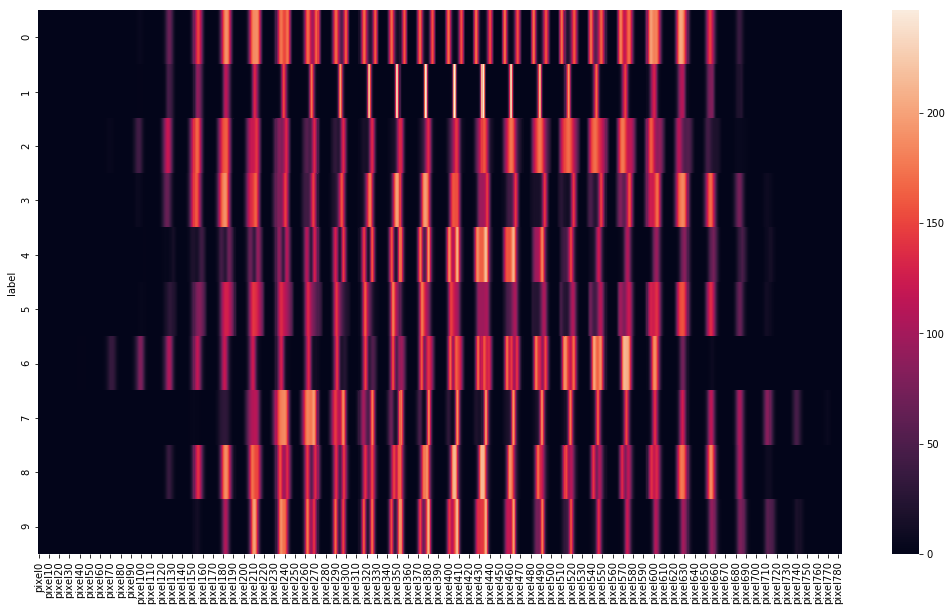

In [100]:

plt.figure(figsize=(18, 10))
sns.heatmap(digit_means)

## Data Preparation

In [101]:
# splitting into X and y
X = random_sample.drop('label', axis = 1)
y = random_sample['label']

In [102]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


## Model Building


In [103]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [104]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.898015873015873 

[[208   0   3   0   1   6   0   0   0   0]
 [  0 270   0   2   0   2   0   1   3   0]
 [  3   0 231   6   4   1   5   3   4   2]
 [  2   1   8 249   0   8   0   1   8   1]
 [  0   2   3   0 219   1   4   0   1  12]
 [  4   2   1  10   3 184   6   0   2   4]
 [  1   1   3   0   2   2 230   0   1   0]
 [  3   0   6   1   6   2   0 243   0  17]
 [  3   5   5  20   3   3   1   2 211   3]
 [  1   2   4   3  13   0   0  14   0 218]]


The linear model gives approx. 90% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [105]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

C:\Users\NithyaVenkataRamanaR\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [106]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9337301587301587 

[[210   0   2   0   0   2   3   1   0   0]
 [  0 270   1   1   1   1   1   1   2   0]
 [  1   2 243   4   1   0   0   1   5   2]
 [  1   1   9 259   0   3   0   2   3   0]
 [  0   1   6   0 224   0   2   1   1   7]
 [  1   0   7   6   1 196   3   0   1   1]
 [  0   1   2   0   1   2 234   0   0   0]
 [  2   2  10   0   0   0   0 250   0  14]
 [  2   3   0   4   1   4   2   0 237   3]
 [  1   1   4   5   6   0   0   8   0 230]]


The non-linear model gives approx. 93% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

In [107]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [0.1,1, 10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy',     
                        n_jobs=-1,
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 21.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [108]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,100.138762,0.695716,12.177465,0.182560,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.326531,0.315476,0.386054,...,0.350850,0.026207,9,0.395196,0.374150,0.448342,0.415391,0.452168,0.417049,0.030111
1,55.335614,0.463318,10.904488,0.136448,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.850340,0.838435,0.863095,...,0.854932,0.009432,5,0.871599,0.872449,0.871173,0.870748,0.870748,0.871344,0.000636
2,98.282171,1.418383,13.137568,0.696786,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.602041,0.591837,0.640306,...,0.606633,0.021489,8,0.617560,0.599490,0.656250,0.612457,0.608206,0.618793,0.019644
3,99.046045,2.707511,11.865662,0.906195,1,0.01,"{'C': 1, 'gamma': 0.01}",0.732993,0.731293,0.761905,...,0.738776,0.011615,7,1.000000,0.999787,1.000000,1.000000,0.999787,0.999915,0.000104
4,29.211103,0.737065,8.013631,1.128884,1,0.001,"{'C': 1, 'gamma': 0.001}",0.925170,0.924320,0.931122,...,0.924830,0.005091,2,0.974490,0.973002,0.973214,0.971301,0.973002,0.973002,0.001015
5,41.312157,0.644554,9.643374,0.156344,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.890306,0.884354,0.903061,...,0.894048,0.006512,4,0.913265,0.911139,0.909651,0.909651,0.909864,0.910714,0.001391
6,101.466526,1.163160,11.330928,0.123482,10,0.01,"{'C': 10, 'gamma': 0.01}",0.750850,0.746599,0.774660,...,0.756122,0.009746,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,23.843596,0.298564,6.500844,0.301226,10,0.001,"{'C': 10, 'gamma': 0.001}",0.929422,0.933673,0.942177,...,0.931633,0.005906,1,0.999575,0.999575,0.999787,0.999575,0.999362,0.999575,0.000134
8,18.287792,2.849960,4.948884,1.270811,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.919218,0.917517,0.927721,...,0.921088,0.004576,3,0.960884,0.959396,0.960247,0.960247,0.963435,0.960842,0.001380


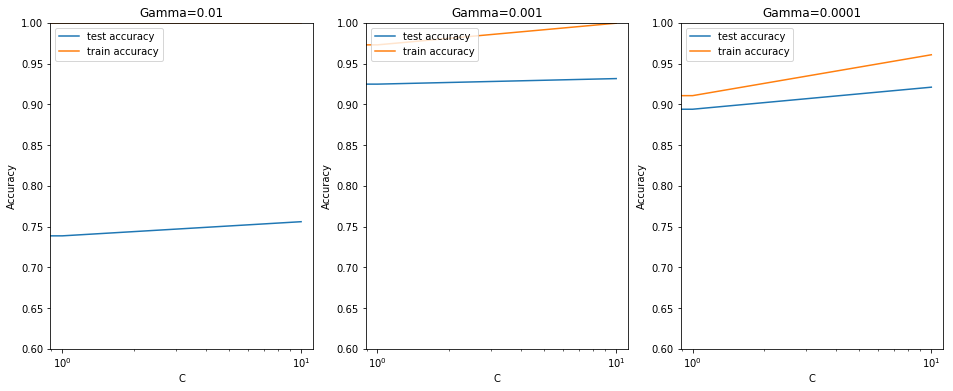

In [109]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [110]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9316326530612244 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

In [111]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.942063492063492 

[[212   0   2   0   0   2   1   1   0   0]
 [  0 270   1   1   0   1   2   1   2   0]
 [  1   0 247   4   1   0   0   1   3   2]
 [  0   1   7 263   0   4   0   1   2   0]
 [  0   3   6   0 221   0   3   1   1   7]
 [  2   0   3   5   1 196   4   0   2   3]
 [  1   1   2   0   1   1 234   0   0   0]
 [  2   1   8   1   0   0   0 255   0  11]
 [  3   2   1   6   1   0   1   1 239   2]
 [  1   1   4   2   5   1   0   3   1 237]] 



In [112]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred), "\n")

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       218
           1       0.97      0.97      0.97       278
           2       0.88      0.95      0.91       259
           3       0.93      0.95      0.94       278
           4       0.96      0.91      0.94       242
           5       0.96      0.91      0.93       216
           6       0.96      0.97      0.96       240
           7       0.97      0.92      0.94       278
           8       0.96      0.93      0.94       256
           9       0.90      0.93      0.92       255

   micro avg       0.94      0.94      0.94      2520
   macro avg       0.94      0.94      0.94      2520
weighted avg       0.94      0.94      0.94      2520
 



## Conclusion : Model has 94% accuracy